### <font color='purple'><b>Importing the libraries :

In [14]:
import glob     # to extract the paths under directory and sub-directories
import textract      # to read .docx files
from pdfminer.high_level import extract_text    # to read .pdf files
from win32com import client as wc     # to read .doc files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### <font color='purple'><b>Data Extraction :

#### <font color='magenta'><b><I>paths of .doc files :

In [4]:
files3 = glob.glob('C:\\Users\\Dell\\Downloads\\Resumes-20230307T022209Z-001\\resume\\**\\*.doc',recursive=True)
for i in files3:
    print(i)

C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\React Developer_PavasGoswami.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\React Developer_Vinay Reddy.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\React JS Developer_AnjaniPriyadarshini.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesoft resumes\Peoplesoft Admin_srinivasarao.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesoft resumes\Peoplesoft Admin_Vinod Akkala.doc
C:\Users\Dell\Downloads\Resumes-20230307T022209Z-001\resume\Resumes\Peoplesof

#### <font color='magenta'><b><I>paths of .docx files :

In [40]:
filesx = glob.glob('C:\\Users\Dell\\Downloads\\Resumes-20230307T054753Z-001\\resume\\**\\*.docx',recursive=True)
for i in filesx:
    print(i)

C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\Internship_Ravali_Musquare Technologies (1).docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\Internship_Susovan Bag_Musquare Technologies.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Deepakreddy.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Haripriya.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Kamalakar Reddy.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Naveen sadhu.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Pragnya.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Sarala Madasu-converted.docx
C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\React Developer_Thirupathiamma.docx
C:\Users\Dell\Downloads\Resumes-20230307T054

#### <font color='magenta'><b><I>paths of .pdf files :

In [41]:
files2 = glob.glob('C:\\Users\Dell\\Downloads\\Resumes-20230307T054753Z-001\\resume\\**\\*.pdf',recursive=True)
for i in files2:
    print(i)

C:\Users\Dell\Downloads\Resumes-20230307T054753Z-001\resume\Resumes\Reactjs Developer_Prabakaran_Musquare Technologies.pdf


#### <font color='magenta'><b><I>total number of files :

In [44]:
tot = files3 + filesx + files2
print('Total no. of extracted files =', len(tot))

Total no. of extracted files = 79


#### <font color='green'><b>Text Extraction of .doc files and converting it to pandas dataframe along with the filenames as categories :

In [26]:
files3 = glob.glob('C:\\Users\Dell\\Downloads\\Resumes-20230307T054753Z-001\\resume\\**\\*.doc',recursive=True)
res_list = []
df1 = pd.DataFrame(files3,columns=['category'])
df1 = df1['category'].str.split('\\').str[7]
df1.columns = ['category']
for i in files3:
    w = wc.Dispatch('Word.Application')
    doc = w.Documents.Open(i)
    #text = line.replace('\t', ' ') for line in doc.content().split('\r') if line
    res_list.append(doc.content())
    #print(res_list)

df3 = pd.DataFrame(res_list,columns=['resume_text'])
df3 = df3.join(df1)
df3

resume_text  \
0   \r\r
PROFILE\rSearching for the opportunity ...   
1   Maryala Vinay Reddy\r\rProfessional Summary:\t...   
2   CURRICULUM VITAE\r\r\r\rAnjani Priyadarshini\r...   
3   \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...   
4   PeopleSoft Database Administrator\r           ...   
5   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...   
6   PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...   
7   Vinod Akkala                                  ...   
8    PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...   
9   Arun Venu\r\r  EXPERIENCE SUMMARY\t\r\rExperie...   
10  Personal Details\t\t\r\rName\rPritam Biswas...   
11  Rahul Ahuja\r---------------------------------...   
12  \rR Ahmed                                     ...   
13  
\r\r Hyderabad\rNazeer Basha\rSQL and Power...   
14                                         SQL SER...   
15  Career objective\r\t\rA rewarding opportunity ...   
16  Hari Krishna M\r\r\rSummary:\rA result oriente...   
17  Harikrishna Akula                             ...   
18  HIMA.MENDU\r  \r\rCareer Objective\rTo continu...   
19  \t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...   
20  \t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...   
21  Name\t: Naresh Babu Cherukuri\r\rObjective:\rT...   
22  \r\r\r3.3 years of IT experience as Workda...   
23  Shireesh Balasani                             ...   
24  \tWorkday Integration Consultant\r\rName      ...   
25  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   

                                      category  
0             React Developer_PavasGoswami.doc  
1              React Developer_Vinay Reddy.doc  
2   React JS Developer_AnjaniPriyadarshini.doc  
3                           Peoplesoft resumes  
4                           Peoplesoft resumes  
5                           Peoplesoft resumes  
6                           Peoplesoft resumes  
7                           Peoplesoft resumes  
8                           Peoplesoft resumes  
9                           Peoplesoft resumes  
10                          Peoplesoft resumes  
11                          Peoplesoft resumes  
12                          Peoplesoft resumes  
13             SQL Developer Lightning insight  
14             SQL Developer Lightning insight  
15             SQL Developer Lightning insight  
16                             workday resumes  
17                             workday resumes  
18                             workday resumes  
19                             workday resumes  
20                             workday resumes  
21                             workday resumes  
22                             workday resumes  
23                             workday resumes  
24                             workday resumes  
25                             workday resumes

In [27]:
df3.loc[0:2,'category'] = 'ReactJS Developer'
df3.loc[3:12,'category'] = 'Peoplesoft'
df3.loc[13:15,'category'] = 'SQL Developer'
df3.loc[16:25,'category'] = 'Workday'
df3

resume_text           category
0   \r\r
PROFILE\rSearching for the opportunity ...  ReactJS Developer
1   Maryala Vinay Reddy\r\rProfessional Summary:\t...  ReactJS Developer
2   CURRICULUM VITAE\r\r\r\rAnjani Priyadarshini\r...  ReactJS Developer
3   \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...         Peoplesoft
4   PeopleSoft Database Administrator\r           ...         Peoplesoft
5   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...         Peoplesoft
6   PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...         Peoplesoft
7   Vinod Akkala                                  ...         Peoplesoft
8    PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...         Peoplesoft
9   Arun Venu\r\r  EXPERIENCE SUMMARY\t\r\rExperie...         Peoplesoft
10  Personal Details\t\t\r\rName\rPritam Biswas...         Peoplesoft
11  Rahul Ahuja\r---------------------------------...         Peoplesoft
12  \rR Ahmed                                     ...         Peoplesoft
13  
\r\r Hyderabad\rNazeer Basha\rSQL and Power...      SQL Developer
14                                         SQL SER...      SQL Developer
15  Career objective\r\t\rA rewarding opportunity ...      SQL Developer
16  Hari Krishna M\r\r\rSummary:\rA result oriente...            Workday
17  Harikrishna Akula                             ...            Workday
18  HIMA.MENDU\r  \r\rCareer Objective\rTo continu...            Workday
19  \t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...            Workday
20  \t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...            Workday
21  Name\t: Naresh Babu Cherukuri\r\rObjective:\rT...            Workday
22  \r\r\r3.3 years of IT experience as Workda...            Workday
23  Shireesh Balasani                             ...            Workday
24  \tWorkday Integration Consultant\r\rName      ...            Workday
25  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...            Workday

#### <font color='green'><b>Text Extraction of .docx files and converting it to pandas dataframe along with the filenames as categories :

In [32]:
files1 = glob.glob('C:\\Users\Dell\\Downloads\\Resumes-20230307T054753Z-001\\resume\\**\\*.docx',recursive=True)
res_list1 = []
dfx = pd.DataFrame(files1,columns=['category'])
dfx = dfx['category'].str.split('\\').str[7]
dfx.columns = ['category']

for i in files1:
    a = textract.process(i)
    res_list1.append((a).decode('utf-8'))

dfr = pd.DataFrame(res_list1,columns=['resume_text'])

dfr = dfr.join(dfx)
dfr

resume_text  \
0   Name: Ravali P \n\n\n\n                       ...   
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....   
5   Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
6   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...   
7   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   
8   Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
9   Ui-Developer/ React JS Developer \n\nNAME: KRI...   
10  Ui-Developer/ React JS Developer \n\nNAME: KRI...   
11  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...   
12  Venkatalakshmi Pedireddy\n\nSoftware Developer...   
13  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...   
14  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...   
15  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...   
16  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...   
17  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...   
18  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...   
19  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...   
20  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...   
21  Classification: Internal\n\nClassification: In...   
22  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...   
23  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...   
24  PeopleSoft Administration\n\n \n\nVivekanand S...   
25  Hari Narayana \t\t              \n\n\t\n\n\n\n...   
26  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...   
27  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...   
28  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...   
29  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...   
30  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
31  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
32  BUDDHA VAMSI                                  ...   
33  KAMBALLA PRADEEP                              ...   
34  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
35  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
36  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
37  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
38  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
39  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
40  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   
41  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...   
42  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...   
43  G Himaja\n\n                                  ...   
44  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...   
45  Mooraboyina Guravaiah\n\nWorkday Integration S...   
46  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...   
47  Workday HCM  Techno functional Consultant     ...   
48  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...   
49  Srikanth (WORKDAY hCM Consultant)\t           ...   
50  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...   
51  Vinay kumar .v\nWorkday Functional Consultant\...   

                                             category  
0    Internship_Ravali_Musquare Technologies (1).docx  
1   Internship_Susovan Bag_Musquare Technologies.docx  
2                    React Developer_Deepakreddy.docx  
3                      React Developer_Haripriya.docx  
4                React Developer_Kamalakar Reddy.docx  
5                   React Developer_Naveen sadhu.docx  
6                        React Developer_Pragnya.docx  
7        React Developer_Sarala Madasu-converted.docx  
8                 React Developer_Thirupathiamma.docx  
9                        React Dev_Krishna Kanth.docx  
10  React Dev_Krishna Kanth_Musquare Technologies....  
11  React JS Developer_KotaniDurgaprasad[3_1] (1)-...  
12  React JS Developer_Venkatalakshmi (1)-converte...  
13  Reactjs Developer_kambala sai surendra_Musquar...  
14  Reactjs Developer_M Lokesh Babu_Musquare Techn...  
15                    Reactjs Developer_M Lokesh.docx  
16  Reactjs Developer_MD Khizaruddin Rauf _Musquar...  
17  Reactjs 

In [33]:
dfr.loc[0:1,'category'] = 'Internship'
dfr.loc[2:19,'category'] = 'ReactJS Developer'
dfr.loc[20:29,'category'] = 'Peoplesoft'
dfr.loc[30:40,'category'] = 'SQL Developer'
dfr.loc[41:51,'category'] = 'Workday'
dfr

resume_text           category
0   Name: Ravali P \n\n\n\n                       ...         Internship
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...         Internship
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  ReactJS Developer
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...  ReactJS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  ReactJS Developer
5   Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  ReactJS Developer
6   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  ReactJS Developer
7   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  ReactJS Developer
8   Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  ReactJS Developer
9   Ui-Developer/ React JS Developer \n\nNAME: KRI...  ReactJS Developer
10  Ui-Developer/ React JS Developer \n\nNAME: KRI...  ReactJS Developer
11  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  ReactJS Developer
12  Venkatalakshmi Pedireddy\n\nSoftware Developer...  ReactJS Developer
13  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  ReactJS Developer
14  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactJS Developer
15  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  ReactJS Developer
16  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  ReactJS Developer
17  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  ReactJS Developer
18  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  ReactJS Developer
19  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  ReactJS Developer
20  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...         Peoplesoft
21  Classification: Internal\n\nClassification: In...         Peoplesoft
22  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...         Peoplesoft
23  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...         Peoplesoft
24  PeopleSoft Administration\n\n \n\nVivekanand S...         Peoplesoft
25  Hari Narayana \t\t              \n\n\t\n\n\n\n...         Peoplesoft
26  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...         Peoplesoft
27  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...         Peoplesoft
28  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...         Peoplesoft
29  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...         Peoplesoft
30  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...      SQL Developer
31  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...      SQL Developer
32  BUDDHA VAMSI                                  ...      SQL Developer
33  KAMBALLA PRADEEP                              ...      SQL Developer
34  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...      SQL Developer
35  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...      SQL Developer
36  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...      SQL Developer
37  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...      SQL Developer
38  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...      SQL Developer
39  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...      SQL Developer
40  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...      SQL Developer
41  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...            Workday
42  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...            Workday
43  G Himaja\n\n                                  ...            Workday
44  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...            Workday
45  Mooraboyina Guravaiah\n\nWorkday Integration S...            Workday
46  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...            Workday
47  Workday HCM  Techno functional Consultant     ...            Workday
48  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...            Workday
49  Srikanth (WORKDAY hCM Consultant)\t           ...            Workday
50  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...            Workday
51  Vinay kumar .v\nWorkday Functional Consultant\...            Workday

#### <font color='green'><b>Text Extraction of .pdf files and converting it to pandas dataframe along with the filenames as categories :

In [36]:
res_list2 = []
files2 = glob.glob('C:\\Users\Dell\\Downloads\\Resumes-20230307T054753Z-001\\resume\\**\\*.pdf',recursive=True)
dfp = pd.DataFrame(files2,columns=['category'])
dfp = dfp['category'].str.split('\\').str[7]
dfp.columns = ['category']

for i in files2:
    c = extract_text(i)
    res_list2.append(c)
    
dfd = pd.DataFrame(res_list2,columns=['resume_text'])
dfd = dfd.join(dfp)
dfd

resume_text  \
0   \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...   

                                            category  
0  Reactjs Developer_Prabakaran_Musquare Technolo...

In [37]:
dfd.loc[0,'category'] = 'ReactJS Developer'
dfd

resume_text           category
0   \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  ReactJS Developer

#### <font color='orange'><b>Final Dataframe :

In [38]:
df = pd.concat([dfr, dfd, df3], axis=0,ignore_index=1)
df

resume_text           category
0   Name: Ravali P \n\n\n\n                       ...         Internship
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...         Internship
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  ReactJS Developer
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...  ReactJS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  ReactJS Developer
..                                                ...                ...
74  Name\t: Naresh Babu Cherukuri\r\rObjective:\rT...            Workday
75  \r\r\r3.3 years of IT experience as Workda...            Workday
76  Shireesh Balasani                             ...            Workday
77  \tWorkday Integration Consultant\r\rName      ...            Workday
78  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...            Workday

[79 rows x 2 columns]

#### <font color='orange'><b>Saving it in csv form :

In [39]:
df.to_csv("resumes.csv")

### <font color='purple'><b>Visualization of count of Categories of Resumes :

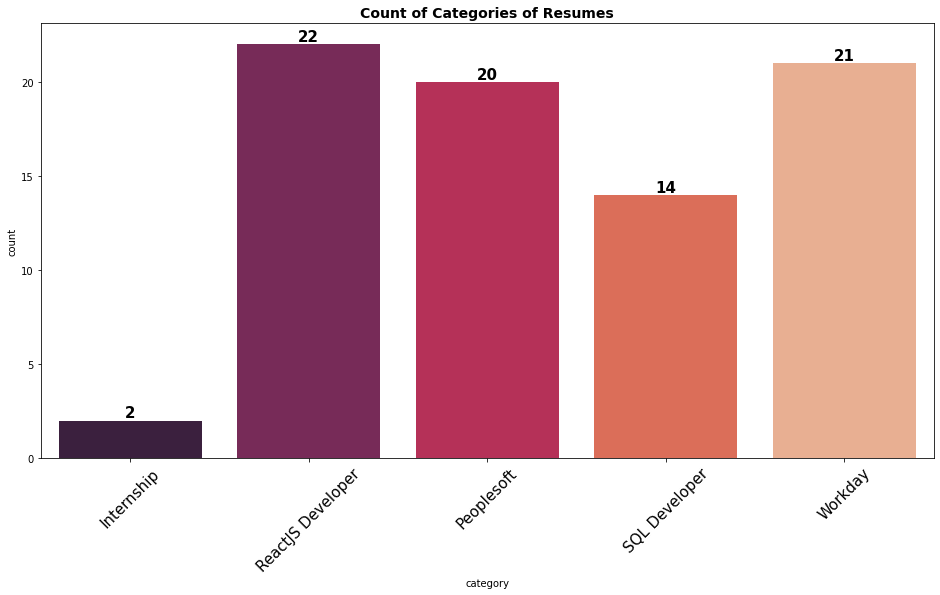

In [50]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='category',data=df, palette='rocket')
plt.xticks(rotation=45, fontsize=15);
plt.title('Count of Categories of Resumes',fontsize = 14, fontweight = 'bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=15, fontweight='bold')